In [56]:
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

### EDA

In [57]:
# glossary : https://www.basketball-reference.com/about/glossary.html
data = pd.read_csv('C:/Users/Satyajit Panigrahi/Downloads/nba_2013.csv')
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [58]:
data.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [59]:
# basic inferences about data type and count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [60]:
# dropping unnecessary and ambiguous columns( Never play with unknown data! )

df = data.drop(['bref_team_id','season','season_end','fg.','x3p.','x2p.','efg.','ft.'],axis = 1)
print(df.isnull().sum())

player    0
pos       0
age       0
g         0
gs        0
mp        0
fg        0
fga       0
x3p       0
x3pa      0
x2p       0
x2pa      0
ft        0
fta       0
orb       0
drb       0
trb       0
ast       0
stl       0
blk       0
tov       0
pf        0
pts       0
dtype: int64


In [61]:
# checking if we have some sneaky null values.

df = df.fillna(df.mean())
print(df.isnull().sum())

player    0
pos       0
age       0
g         0
gs        0
mp        0
fg        0
fga       0
x3p       0
x3pa      0
x2p       0
x2pa      0
ft        0
fta       0
orb       0
drb       0
trb       0
ast       0
stl       0
blk       0
tov       0
pf        0
pts       0
dtype: int64


In [62]:
# encoding the position column so as to make all our training data numerical

encoder = LabelEncoder()
df['pos'] = encoder.fit_transform(df['pos'])
df.head()

,player,pos,age,g,gs,mp,fg,fga,x3p,x3pa,...,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Quincy Acy,5,23,63,0,847,66,141,4,15,...,53,72,144,216,28,23,26,30,122,171
1,Steven Adams,0,20,81,20,1197,93,185,0,0,...,136,142,190,332,43,40,57,71,203,265
2,Jeff Adrien,3,27,53,12,961,143,275,0,0,...,119,102,204,306,38,24,36,39,108,362
3,Arron Afflalo,6,28,73,73,2552,464,1011,128,300,...,336,32,230,262,248,35,3,146,136,1330
4,Alexis Ajinca,0,25,56,30,951,136,249,0,1,...,67,94,183,277,40,23,46,63,187,328


In [34]:
df.describe()

,pos,age,g,gs,mp,fg,fga,x3p,x3pa,x2p,...,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,3.700624,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,39.613306,110.130977,153.268191,...,120.642412,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121
std,2.062002,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,50.855639,132.751732,147.223161,...,131.240639,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228
min,0.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.000000,3.000000,31.000000,...,22.000000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000
50%,4.000000,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,16.000000,48.000000,110.000000,...,73.000000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000
75%,5.000000,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,68.000000,193.000000,230.000000,...,179.000000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000
max,6.000000,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,261.000000,615.000000,706.000000,...,805.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000


### Data preparation

In [63]:
features = df.iloc[:,1:27]
labels = df.iloc[:,-1]
trainX,testX,trainY,testY=train_test_split(features,labels,test_size=0.25,random_state=42)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(360, 22)
(360,)
(121, 22)
(121,)


In [64]:
features.head()

,pos,age,g,gs,mp,fg,fga,x3p,x3pa,x2p,...,fta,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,5,23,63,0,847,66,141,4,15,62,...,53,72,144,216,28,23,26,30,122,171
1,0,20,81,20,1197,93,185,0,0,93,...,136,142,190,332,43,40,57,71,203,265
2,3,27,53,12,961,143,275,0,0,143,...,119,102,204,306,38,24,36,39,108,362
3,6,28,73,73,2552,464,1011,128,300,336,...,336,32,230,262,248,35,3,146,136,1330
4,0,25,56,30,951,136,249,0,1,136,...,67,94,183,277,40,23,46,63,187,328


In [65]:
labels.head()

0     171
1     265
2     362
3    1330
4     328
Name: pts, dtype: int64

In [66]:
#feature scaling so as not to mislead our model (quality over quantity) .

sc = StandardScaler()
trainX = sc.fit_transform(trainX)
testX = sc.transform(testX)

### Generating model

In [67]:
# using elbow score to determine neighbours

<AxesSubplot:>

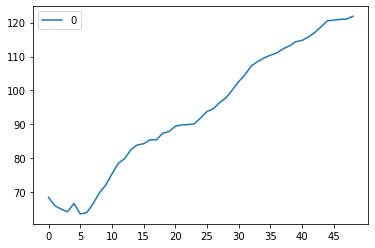

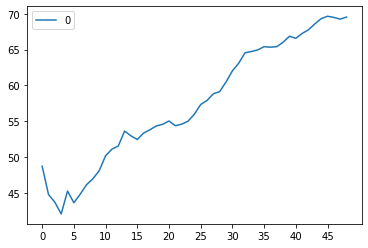

In [68]:
error_mse = []
error_mae = []
for i in range(2,51):
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(trainX,trainY)
    pred = model.predict(testX)
    mse = sqrt(mean_squared_error(testY,pred))
    mae = mean_absolute_error(testY,pred)
    error_mse.append(mse)
    error_mae.append(mae)
curve_mse = pd.DataFrame(error_mse)
curve_mae = pd.DataFrame(error_mae)
curve_mse.plot(xticks = np.arange(0,50,5))
curve_mae.plot(xticks = np.arange(0,50,5))

In [69]:
model = KNeighborsRegressor(n_neighbors = 8,weights = 'distance')
model.fit(trainX,trainY)
pred = model.predict(testX)
mse = sqrt(mean_squared_error(testY,pred))
mae = mean_absolute_error(testY,pred)
print(mae)
print(mse)

43.43535025485306
61.89693145110797


In [70]:
# using gridsearch CV method to determine neighbours

In [71]:
l = [i for i in range(2,51)]
params = {'n_neighbors':l}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(trainX,trainY)
model.best_params_

{'n_neighbors': 6}

In [72]:
pred = model.predict(testX)
mae = mean_absolute_error(testY,pred)
mse = sqrt(mean_squared_error(testY,pred))
print(mae)
print(mse)

45.26170798898072
66.62462861929754


In [73]:
# inferencing from r2 score

In [74]:
for k in range(10):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(trainX, trainY) 
    pred = knn.predict(testX)
    print ("Regression score is:",format(metrics.r2_score(testY, pred),'.4f'), "for k_value:", k_value)

Regression score is: 0.9605 for k_value: 1
Regression score is: 0.9769 for k_value: 2
Regression score is: 0.9785 for k_value: 3
Regression score is: 0.9792 for k_value: 4
Regression score is: 0.9797 for k_value: 5
Regression score is: 0.9781 for k_value: 6
Regression score is: 0.9801 for k_value: 7
Regression score is: 0.9799 for k_value: 8
Regression score is: 0.9782 for k_value: 9
Regression score is: 0.9760 for k_value: 10


In [75]:
# we get the best score for k-value = 7

In [76]:
model = KNeighborsRegressor(n_neighbors = 7,weights = 'distance')
model.fit(trainX,trainY)
pred = model.predict(testX)
mse = sqrt(mean_squared_error(testY,pred))
mae = mean_absolute_error(testY,pred)
print(mae)
print(mse)

42.43865373535808
61.599905944882735


In [77]:
results = pd.DataFrame({'Actual Points': testY.tolist(), 'Predicted Points': pred.tolist()})
results

,Actual Points,Predicted Points
0,587,572.081244
1,89,67.551887
2,350,343.736674
3,1417,1477.407277
4,1071,1007.999745
...,...,...
116,1295,1263.139938
117,799,765.585000
118,346,342.334259
119,930,814.087429
